# Visualization of GX460 Prices 
## Data from cars.com on May-03-2024

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


In [2]:
cars = pd.read_csv('data/output_May-03-2024_cleaned.csv')

In [3]:
cars.head()

,Title,Miles,Price,Deal,Stock,Year,Make,Model,Sub_Model
0,2014 Lexus GX 460 460,118146,21995,Good,Used,2014,Lexus,GX 460 460,Base
1,2014 Lexus GX 460 Luxury,133167,24744,Fair,Used,2014,Lexus,GX 460 Luxury,Luxury
2,2014 Lexus GX 460 Base,106325,27995,Fair,Used,2014,Lexus,GX 460 Base,Base
3,2014 Lexus GX 460 Base,116480,23987,Fair,Used,2014,Lexus,GX 460 Base,Base
4,2014 Lexus GX 460 Base,96889,29995,Fair,Used,2014,Lexus,GX 460 Base,Base


## Visuallizations

#### Violin and Box plots for 'Year' vs 'Price'

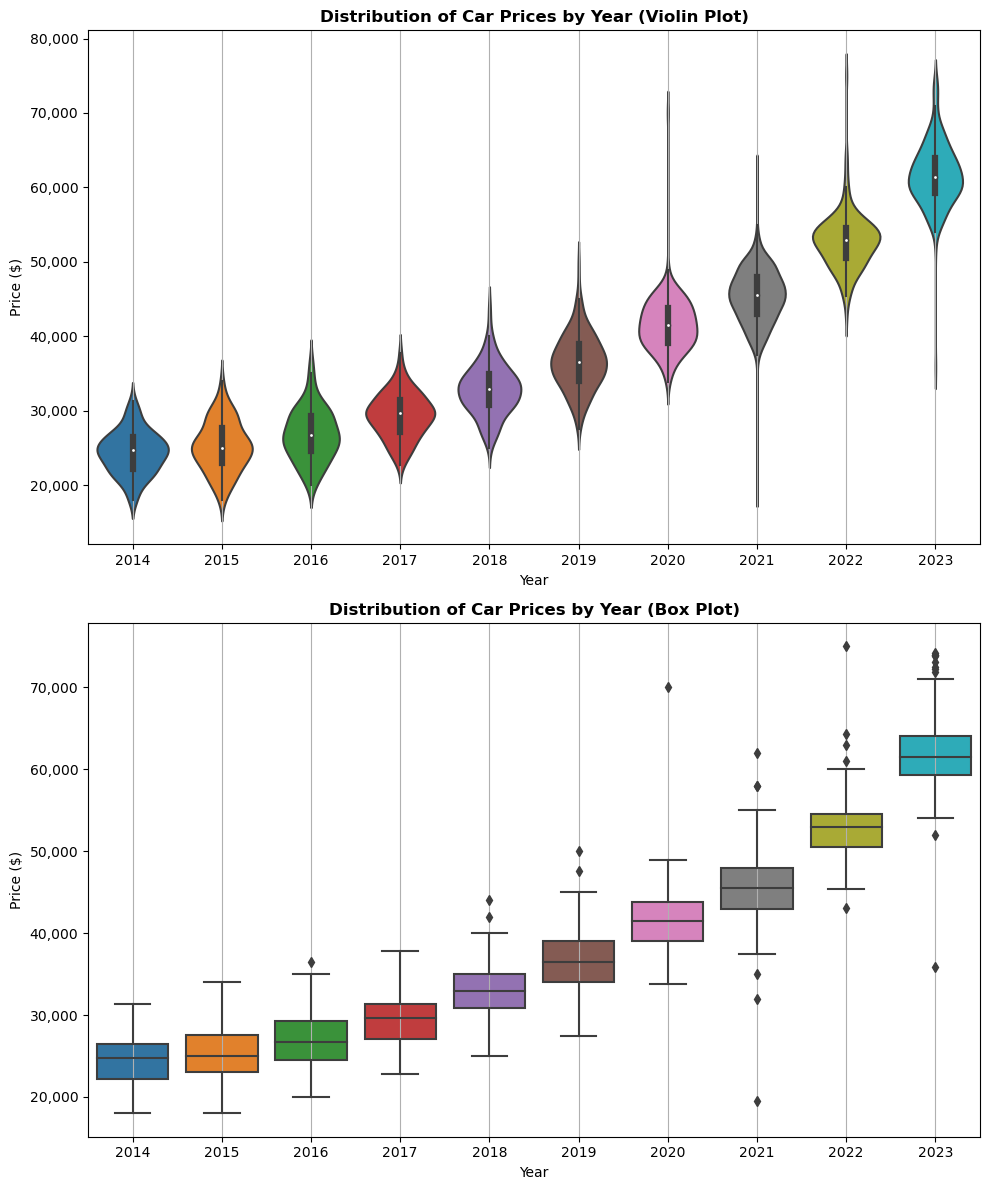

In [6]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Violin plot for 'Year' vs 'Price'
sns.violinplot(data=cars, x='Year', y='Price', ax=axes[0])
axes[0].set_title('Distribution of Car Prices by Year (Violin Plot)', fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price ($)')

# Add formatter for y-axis labels (with commas)
formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
axes[0].yaxis.set_major_formatter(formatter)

# Add vertical grid lines to the violin plot
axes[0].grid(axis='x')

# Box plot for 'Year' vs 'Price'
sns.boxplot(data=cars, x='Year', y='Price', ax=axes[1])
axes[1].set_title('Distribution of Car Prices by Year (Box Plot)', fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Price ($)')

# Add formatter for y-axis labels (with commas)
axes[1].yaxis.set_major_formatter(formatter)

# Add vertical grid lines to the box plot
axes[1].grid(axis='x')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Car Price vs Miles Driven by Deal Type

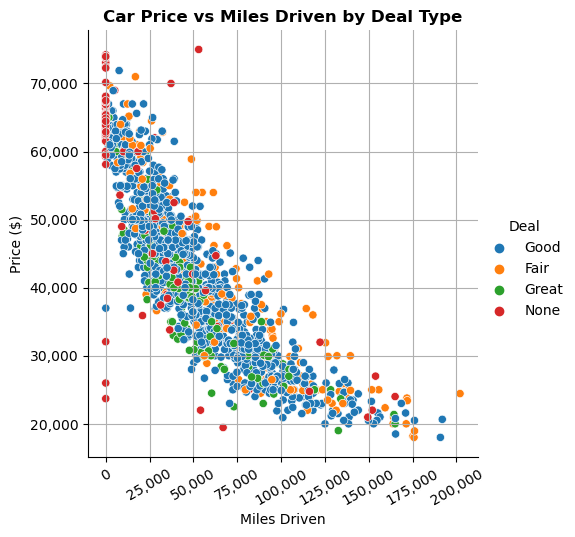

In [7]:
# Create a scatter plot with Seaborn
sns.relplot(data=cars, x='Miles', y='Price', hue="Deal")

# Adding title, labels, and legend
plt.title('Car Price vs Miles Driven by Deal Type', fontweight='bold')
plt.xlabel('Miles Driven')
plt.ylabel('Price ($)')

# Rotate x-axis labels
plt.xticks(rotation=30)

# Format labels with commas
formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Add grid lines
plt.grid(True)

plt.show()

#### Car Price vs Miles Driven by Sub Model

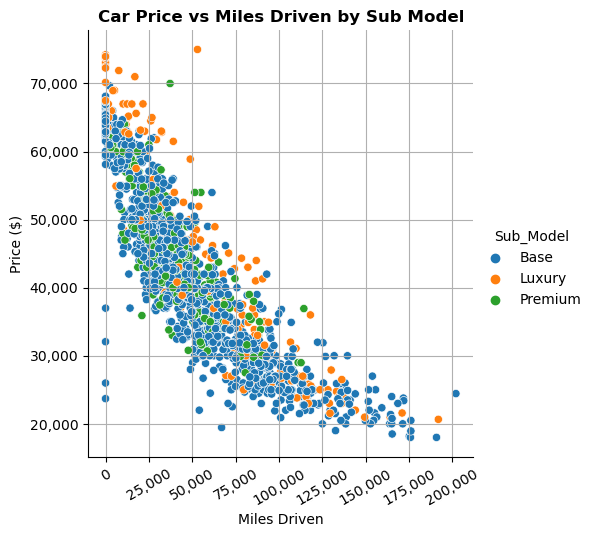

In [8]:
# Create a scatter plot with Seaborn
sns.relplot(data=cars, x='Miles', y='Price', hue="Sub_Model")

# Adding title, labels, and legend
plt.title('Car Price vs Miles Driven by Sub Model', fontweight='bold')
plt.xlabel('Miles Driven')
plt.ylabel('Price ($)')

# Rotate x-axis labels
plt.xticks(rotation=30)

# Format labels with commas
formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Add grid lines
plt.grid(True)

plt.show()

#### Car Price vs Miles Driven (Color Coded by Year)

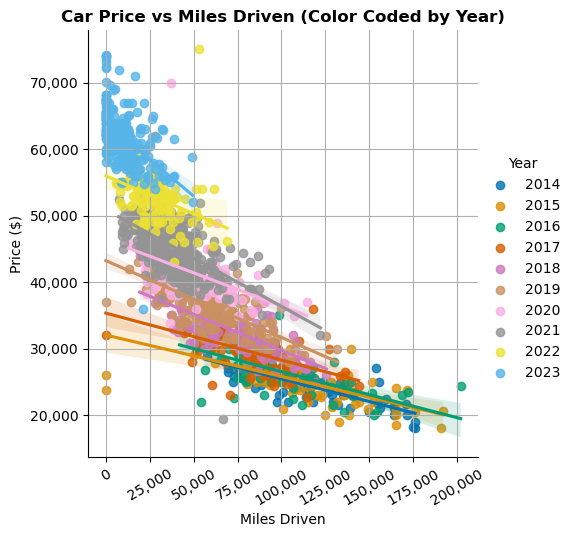

In [9]:
# Create a lmplot with different hues based on "Year"
lm_plot = sns.lmplot(data=cars, x='Miles', y='Price', hue='Year', palette='colorblind')

# Adding title, labels, and legend
plt.title('Car Price vs Miles Driven (Color Coded by Year)', fontweight='bold')
plt.xlabel('Miles Driven')
plt.ylabel('Price ($)')

# Rotate x-axis labels
plt.xticks(rotation=30)

# Format labels with commas
formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Add grid lines
plt.grid(True)

plt.show()

#### Linear Jointplot Car Price vs Miles Driven

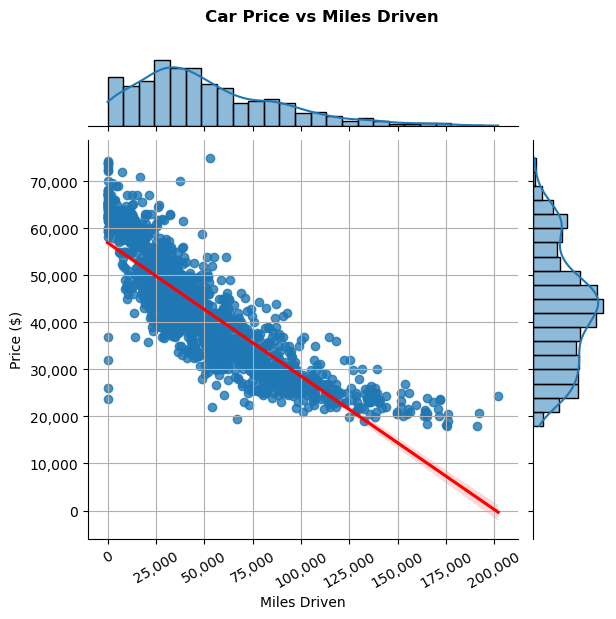

In [10]:
# Create a joint plot with regression line using Seaborn
sns.jointplot(data=cars, x='Miles', y='Price', kind="reg", line_kws={"color": "red"})


# Adding title, labels, and legend
plt.subplots_adjust(top=0.9)  # Adjust subplot spacing for title
plt.suptitle('Car Price vs Miles Driven', fontweight='bold')
plt.xlabel('Miles Driven')
plt.ylabel('Price ($)')

# Rotate x-axis labels
plt.xticks(rotation=30)

# Format labels with commas
formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Add grid lines
plt.grid(True)

plt.show()

#### Polynomial Car Price vs Miles Driven

Polynomial Degree 1 - Intercept: -0.284, Slope: 56962.582, Quadratic Term: NA
Polynomial Degree 2 - Intercept: 0.0, Slope: -0.52, Quadratic Term: 62262.072
Polynomial Degree 3 - Intercept: -0.0, Slope: 0.0, Quadratic Term: -0.607
Polynomial Degree 4 - Intercept: 0.0, Slope: -0.0, Quadratic Term: 0.0


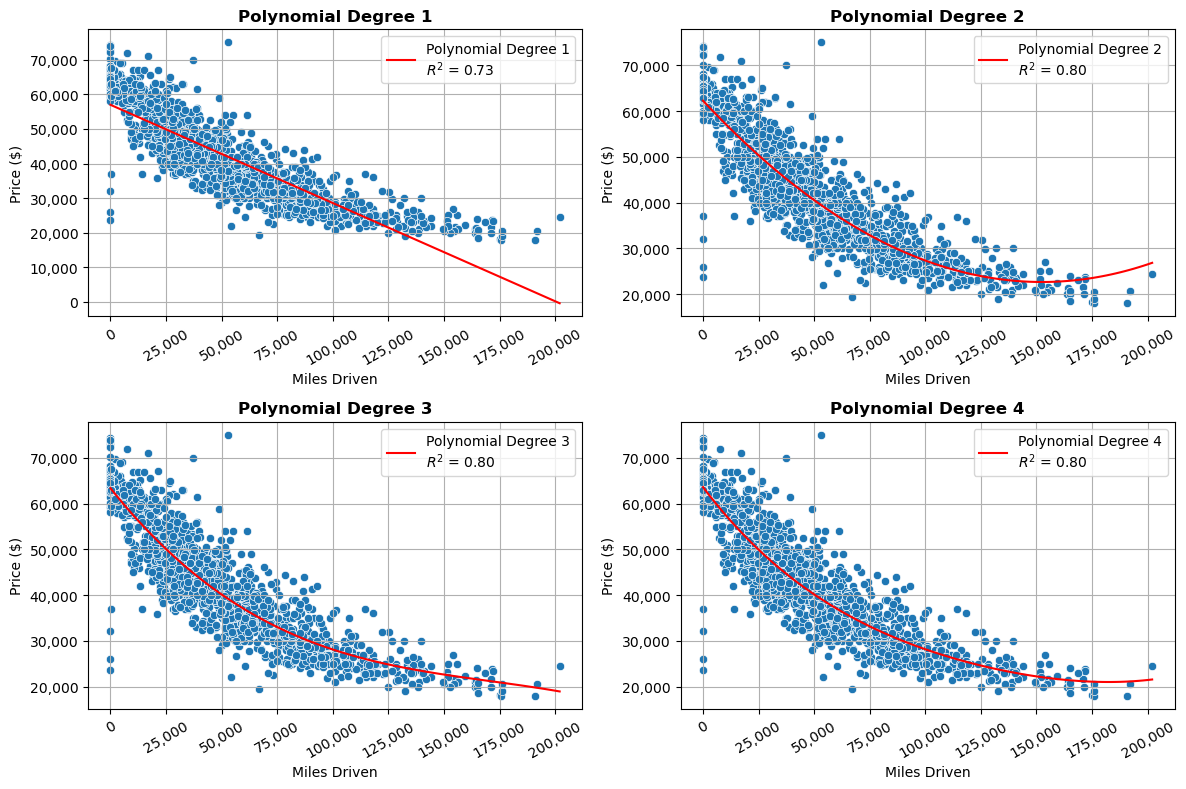

In [11]:
# Define the degrees for polynomial regression
poly_degrees = [1, 2, 3, 4]

# Create a grid of plots for each polynomial degree
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, degree in enumerate(poly_degrees):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Fit a polynomial regression line
    coefficients = np.polyfit(cars['Miles'], cars['Price'], degree)
    poly = np.poly1d(coefficients)

    # Calculate R-squared value
    predicted_prices = poly(cars['Miles'])
    r_squared = r2_score(cars['Price'], predicted_prices)

    # Create a scatter plot with Seaborn
    sns.scatterplot(data=cars, x='Miles', y='Price', ax=ax)

    # Plot the polynomial regression line
    x_values = np.linspace(cars['Miles'].min(), cars['Miles'].max(), 100)
    ax.plot(x_values, poly(x_values), color='red', label=f'Polynomial Degree {degree}\n$R^2$ = {r_squared:.2f}')

    # Adding title, labels, and legend
    ax.set_title(f'Polynomial Degree {degree}', fontweight='bold')
    ax.set_xlabel('Miles Driven')
    ax.set_ylabel('Price ($)')
    ax.legend()

    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=30)

    # Format labels with commas
    formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)

    # Add grid lines
    ax.grid(True)

    # Display polynomial information
    if degree >= 2:
        intercept = round(poly.coeffs[0], 3)
        slope = round(poly.coeffs[1], 3)
        quadratic_term = round(poly.coeffs[2], 3)
        print(f"Polynomial Degree {degree} - Intercept: {intercept}, Slope: {slope}, Quadratic Term: {quadratic_term}")
    else:
        intercept = round(poly.coeffs[0], 3)
        slope = round(poly.coeffs[1], 3)
        quadratic_term = 'NA'
        print(f"Polynomial Degree {degree} - Intercept: {intercept}, Slope: {slope}, Quadratic Term: {quadratic_term}")

plt.tight_layout()
plt.show()

## Modeling

#### Feature Engineering, Preprocessing Pipeline, Model Defintion

In [12]:
# Update 'Year' column to 'Years_From_2014'
cars['Years_From_2014'] = cars['Year'] - 2014

# Define categorical columns and numerical columns
categorical_cols = ['Stock', 'Sub_Model']
numerical_cols = ['Miles', 'Years_From_2014']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),  # Drop first column to avoid multicollinearity
        ('num', 'passthrough', numerical_cols)
    ],
    remainder='drop'
)

# Linear Regression Model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Ridge Regression Model
ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # You can adjust the alpha value for Ridge regularization
])

# Random Forest Regression Model
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100))  # You can adjust the number of estimators
])

# List of models
models = {
    'Linear Regression': model,
    'Ridge Regression': ridge_model,
    'Random Forest Regression': rf_model
}

# Define X and y
X = cars[['Miles', 'Years_From_2014', 'Stock', 'Sub_Model']]
y = cars['Price']

#### Fit and Evaluate Models

In [13]:
print("TRAINED MODELS:\n--------------------------------------")
# Fit and evaluate each model
for model_name, model_pipeline in models.items():
    model_pipeline.fit(X, y)
    y_pred = model_pipeline.predict(X)
    r_squared = r2_score(y, y_pred)

    
    # Print model evaluation metrics
    print(f"{model_name}:")
    print(f"R^2 Score: {r_squared:.4f}")
    
    # If the model is Linear Regression or Ridge Regression, print coefficients
    if model_name in ['Linear Regression', 'Ridge Regression']:
        coefficients = model_pipeline.named_steps['regressor'].coef_
        intercept = model_pipeline.named_steps['regressor'].intercept_
        
        print("Coefficients:")
        if model_name == 'Linear Regression':
            categorical_features = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)
            all_features = list(categorical_features) + numerical_cols
            for feature, coef in zip(all_features, coefficients):
                print(f"{feature.rjust(20)}: {coef:.2f}")
        else:  # For Ridge Regression, directly print coefficients
            for feature, coef in zip(X.columns, coefficients):
                print(f"{feature.rjust(20)}: {coef:.2f}")
    
    # If the model is Random Forest Regression, print feature importances
    elif model_name == 'Random Forest Regression':
        importances = model_pipeline.named_steps['regressor'].feature_importances_
        feature_importance_tuples = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)
        
        print("Feature Importances:")
        for feature, importance in feature_importance_tuples:
            print(f"{feature.rjust(20)}: {importance:.8f}")
    
    print("--------------------------------------")

TRAINED MODELS:
--------------------------------------
Linear Regression:
R^2 Score: 0.8984
Coefficients:
           Stock_New: 2354.67
          Stock_Used: -6076.42
    Sub_Model_Luxury: 3598.06
   Sub_Model_Premium: -966.13
               Miles: -0.10
     Years_From_2014: 3045.52
--------------------------------------
Ridge Regression:
R^2 Score: 0.8984
Coefficients:
               Miles: 2471.41
     Years_From_2014: -5904.15
               Stock: 3580.73
           Sub_Model: -962.48
--------------------------------------
Random Forest Regression:
R^2 Score: 0.9893
Feature Importances:
               Stock: 0.01130653
     Years_From_2014: 0.00316793
           Sub_Model: 0.00233164
               Miles: 0.00028306
--------------------------------------


#### Predict Price on Inputs

In [14]:
def predict_price(miles, stock, year, sub_model):
    # Transform inputs to match model format
    years_from_2014 = year - 2014
    input_data = pd.DataFrame({'Miles': [miles], 'Years_From_2014': [years_from_2014], 'Stock': [stock], 'Sub_Model': [sub_model]})
    
    # Predict price using each model
    predicted_prices = {}
    feature_contributions = {}
    for model_name, model_pipeline in models.items():
        predicted_price = model_pipeline.predict(input_data)
        predicted_prices[model_name] = predicted_price[0]
        
        # Calculate feature contributions for Linear Regression and Ridge Regression
        if model_name in ['Linear Regression', 'Ridge Regression']:
            coefficients = model_pipeline.named_steps['regressor'].coef_
            intercept = model_pipeline.named_steps['regressor'].intercept_

            # Get categorical feature names
            categorical_features = model_pipeline.named_steps['preprocessor'].named_transformers_['cat']\
                .get_feature_names_out(input_features=['Stock', 'Sub_Model'])

            # Combine categorical and numerical feature names
            feature_names = list(categorical_features) + ['Miles', 'Years_From_2014']

            # Calculate contribution of each feature to the prediction
            contribution = intercept
            for feature, coef in zip(feature_names, coefficients):
                if feature == 'Miles':
                    contribution += miles * coef
                elif feature == 'Years_From_2014':
                    contribution += years_from_2014 * coef
                else:
                    contribution += coef
                feature_contributions.setdefault(model_name, {})[feature] = coef  # Store coefficients for interpretation
    
    return predicted_prices, feature_contributions

In [15]:
# Example usage
miles_input = 65000
deal_input = 'Good'
stock_input = 'Used'
year_input = 2017
sub_model_input = 'Base'

predicted_prices, feature_contributions = predict_price(miles_input, stock_input, year_input, sub_model_input)

# Print the header for vehicle attributes
print("Predicting on vehicle with these attributes:")
print(f"Miles: {miles_input}".rjust(20))
print(f"Deal: {deal_input}".rjust(20))
print(f"Stock: {stock_input}".rjust(20))
print(f"Year: {year_input}".rjust(20))
print(f"Sub_Model: {sub_model_input}".rjust(20))

print("\nPredicted Prices:")
for model_name, predicted_price in predicted_prices.items():
    print(f"{model_name}: ${predicted_price:.2f}".rjust(40))

print("\nFeature Contributions:")
for model_name, contributions in feature_contributions.items():
    print(f"{model_name}:")
    print("--------------------------------------")
    for feature, contribution in contributions.items():
        print(f"{feature.rjust(20)}: {contribution:.2f}")

Predicting on vehicle with these attributes:
        Miles: 65000
          Deal: Good
         Stock: Used
          Year: 2017
     Sub_Model: Base

Predicted Prices:
            Linear Regression: $31957.73
             Ridge Regression: $31963.26
     Random Forest Regression: $32588.80

Feature Contributions:
Linear Regression:
--------------------------------------
           Stock_New: 2354.67
          Stock_Used: -6076.42
    Sub_Model_Luxury: 3598.06
   Sub_Model_Premium: -966.13
               Miles: -0.10
     Years_From_2014: 3045.52
Ridge Regression:
--------------------------------------
           Stock_New: 2471.41
          Stock_Used: -5904.15
    Sub_Model_Luxury: 3580.73
   Sub_Model_Premium: -962.48
               Miles: -0.10
     Years_From_2014: 3045.22
